## 1. Introduction

* Brief overview of wind energy in Ireland

* Purpose of the analysis

* Key questions being addressed

(Keep this short: ~1–2 paragraphs)

## 2. Data Acquisition

* Description of Met Éireann dataset

* Time period covered

* Weather variables used

Include:

import pandas as pd

## 3. Data Cleaning and Preparation

This section is very important for marks.

Include:

* Handling missing values

* Data type conversions

* Column renaming

* Date parsing

* Feature creation (year, month)

Explain why each step is necessary.

## 4. Exploratory Data Analysis (EDA)

Suggested analyses:

* Overall wind speed distribution

* Monthly average wind speeds

* Yearly average wind speeds

Suggested plots:

* Histogram of wind speeds

* Line plot of monthly averages

* Boxplot of wind speed by month

Make plots:

* Large

* Labelled

Easy to read

## 5. Wind Energy Potential Analysis

Explain basic turbine constraints:

* Cut-in speed (~3 m/s)

* Rated range

* Cut-out speed (~25 m/s)

Analyses:

* Percentage of time wind is usable

* Seasonal differences in usable wind

This shows real-world application, not just coding.

## 6. Trend Analysis Using Machine Learning

Use **SciKit-Learn**  here.

Steps:

* Aggregate yearly mean wind speed

* Apply linear regression

Visualise trend

Answer:

* Is there a noticeable trend?

* What does it imply for future wind energy?

## 7. Discussion

* Interpret results

* Explain what the trends mean

* Mention data limitations

Bullet points are fine.

## 8. Conclusion

* Directly answer original questions

* Summarise findings

* Suggest future work

Short and clear.

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs for Met Éireann climate data CSV files
stations = {
    "Malin Head": "https://cli.fusio.net/cli/climate_data/webdata/dly1575.csv",
    "Mace Head": "https://cli.fusio.net/cli/climate_data/webdata/dly275.csv",
    "Valentia Observatory": "https://cli.fusio.net/cli/climate_data/webdata/dly2275.csv",
    "Dublin Airport": "https://cli.fusio.net/cli/climate_data/webdata/dly532.csv"
}

# Load each CSV into a dictionary of DataFrames
# Met Éireann files have header rows that need to be skipped
data = {name: pd.read_csv(url, skiprows=24) for name, url in stations.items()}

# Quick check
for name, df in data.items():
    print(name, df.head())


Malin Head           date  ind  maxtp  ind.1  mintp igmin gmin  ind.2  rain    cbl  ...  \
0  01-may-1955    0    9.4      0    6.9     0  3.8      0   7.4  996.2  ...   
1  02-may-1955    0   11.2      0    5.7     0  5.9      3   0.0  997.1  ...   
2  03-may-1955    0   13.1      0    4.3     0  0.6      0   6.6  989.6  ...   
3  04-may-1955    0   12.8      0    7.8     0  6.1      0   4.4  978.3  ...   
4  05-may-1955    0   13.2      0    8.1     0  6.6      0   2.7  990.3  ...   

  ind.5  hg sun  glorad    soil   pe evap smd_wd smd_md smd_pd  
0     2  48                      1.0  1.9                       
1     0  31              12.300  1.9  3.6                       
2     0  48               9.200  1.4  2.4                       
3     0  41               9.625  2.0  3.6                       
4     0  34              10.775  2.0  3.4                       

[5 rows x 25 columns]
Mace Head           date  ind maxtp  ind.1 mintp igmin gmin  ind.2 rain     cbl  ...  \
0  14-a

In [192]:
for name, df in data.items():
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.ffill(inplace=True)  # Forward fill missing values



C:\Users\finia\AppData\Local\Temp\ipykernel_23420\3903762028.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\finia\AppData\Local\Temp\ipykernel_23420\3903762028.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\finia\AppData\Local\Temp\ipykernel_23420\3903762028.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\finia\AppData\Local\Temp\ipykernel_23420\3903762028.py:2: Use

In [193]:
for name, df in data.items():
    # Set the date as index (already converted to datetime in previous cell)
    df.set_index('date', inplace=True)


C:\Users\finia\AppData\Local\Temp\ipykernel_23420\648030351.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['wdsp'].resample('M').mean()  # Note: use 'wdsp' column


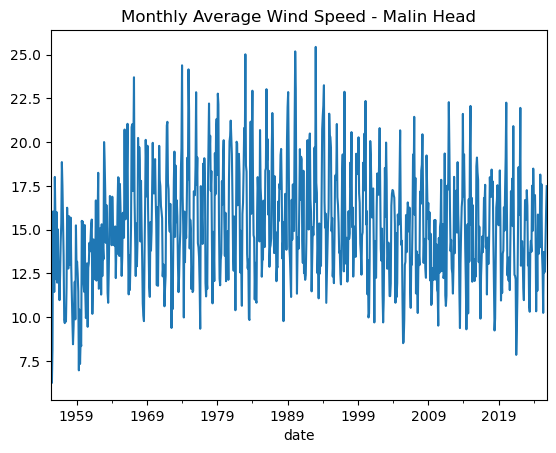

C:\Users\finia\AppData\Local\Temp\ipykernel_23420\648030351.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['wdsp'].resample('M').mean()  # Note: use 'wdsp' column


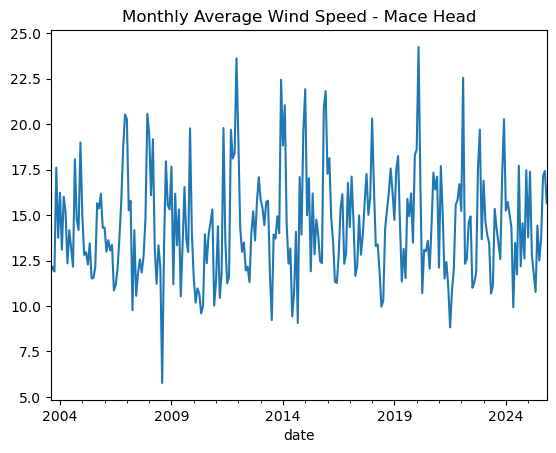

C:\Users\finia\AppData\Local\Temp\ipykernel_23420\648030351.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['wdsp'].resample('M').mean()  # Note: use 'wdsp' column


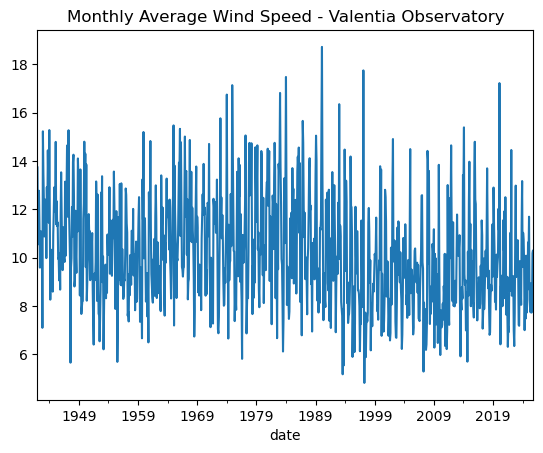

C:\Users\finia\AppData\Local\Temp\ipykernel_23420\648030351.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['wdsp'].resample('M').mean()  # Note: use 'wdsp' column


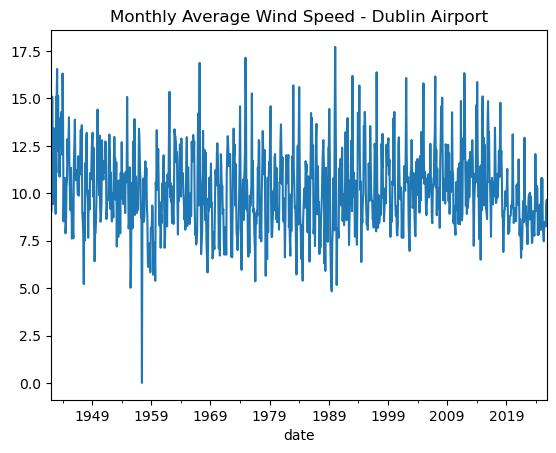

In [196]:
for name, df in data.items():
    df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')  # Convert to numeric
    monthly_avg = df['wdsp'].resample('M').mean()  # Note: use 'wdsp' column
    monthly_avg.plot(title=f"Monthly Average Wind Speed - {name}")
    plt.show()